# <u>__Crop Recommendation__

## Overview:
The "Car Recommendation" dataset provides a synthetic but realistic snapshot of different crops and the conditions in which it has been grown.This dataset includes 2200 rows and 8 columns, which are N, P, K, temperature, humidity, ph, rainfall and label. It is designed to be a valuable resource for researchers, data scientists, and even just a normal farmer to check which crop would be best suited to grow based on their geographical position and fertilizers.

## Dataset Features:
### N:

##### <u>Description</u>: The nitrogen levels present in the soil.
Type: Numerical

### P:

##### <u>Description</u>: The phosphorous levels present in the soil.
Type: Numerical

### K:

##### <u>Description</u>: The potassium levels present in the soil.
Type: Numerical

### temperature:

##### <u>Description</u>: The temperature in which the crop is grown.
Type: Numerical

### ph:

##### <u>Description</u>: The ph level of the soil.
Type: Numerical

### rainfall:

##### <u>Description</u>: The cm of rainfall recieved.
Type: Numerical

### label:

##### <u>Description</u>: The crop types.
Type: Categorical



### Potential Use Cases:
* *Crop Yield Prediction*: Predict crop yields based on nutrient levels, rainfall, pH, and temperature.
- *Fertilizer Optimization*: Determine optimal nitrogen, potassium, and phosphorous levels for specific crops.
- *Climate-Resilient Farming*: Identify crops suitable for different temperature and rainfall conditions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
z=pd.read_csv('C:/Users/Administrator/Desktop/Crop_recommendation.csv')
z

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
z['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [4]:
z.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
df1=z.select_dtypes(exclude=['object'])
df1

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [6]:
q1=df1.quantile(0.25)
q3=df1.quantile(0.75)
q1

N              21.000000
P              28.000000
K              20.000000
temperature    22.769375
humidity       60.261953
ph              5.971693
rainfall       64.551686
Name: 0.25, dtype: float64

In [7]:
q3

N               84.250000
P               68.000000
K               49.000000
temperature     28.561654
humidity        89.948771
ph               6.923643
rainfall       124.267508
Name: 0.75, dtype: float64

In [8]:
iqr=q3-q1
iqr

N              63.250000
P              40.000000
K              29.000000
temperature     5.792279
humidity       29.686818
ph              0.951950
rainfall       59.715822
dtype: float64

In [9]:
b=(df1<(q1-1.5*iqr))|(df1>(q3+1.5*iqr))
b

,N,P,K,temperature,humidity,ph,rainfall
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False


In [10]:
df=z[~(b).any(axis=1)]
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
13,93,56,36,24.014976,82.056872,6.984354,185.277339,rice
14,94,50,37,25.665852,80.663850,6.948020,209.586971,rice
17,91,35,39,23.793920,80.418180,6.970860,206.261186,rice
20,89,45,36,21.325042,80.474764,6.442475,185.497473,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [11]:
z.shape,df.shape

((2200, 8), (1768, 8))

(array([132., 145., 134., 181., 172., 156.,  33.,  36.,  55.,  48.,  52.,
         85., 104.,  87., 103.,  94.,  84.,  36.,  18.,  13.]),
 array([  0.,   7.,  14.,  21.,  28.,  35.,  42.,  49.,  56.,  63.,  70.,
         77.,  84.,  91.,  98., 105., 112., 119., 126., 133., 140.]),
 <BarContainer object of 20 artists>)

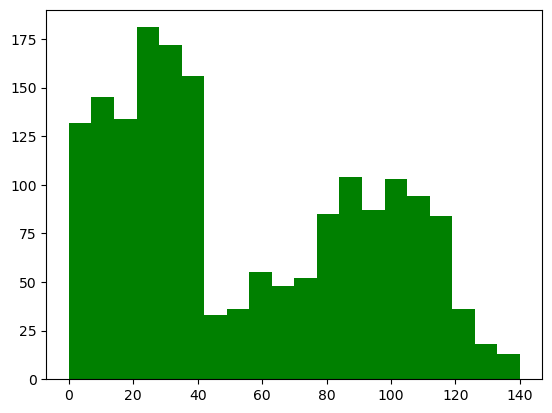

In [13]:
plt.hist(df['N'],bins=20,color='green')

(array([103.,  61., 115.,  97., 135.,  84.,  81., 113., 106.,  71.,  86.,
        142., 147.,  86., 112.,  85.,  95.,  10.,  21.,  18.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ,
        54.5, 59. , 63.5, 68. , 72.5, 77. , 81.5, 86. , 90.5, 95. ]),
 <BarContainer object of 20 artists>)

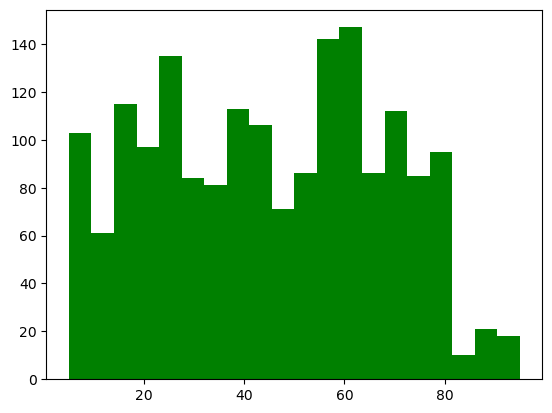

In [14]:
plt.hist(df['P'],bins=20,color='green')

(array([ 27.,  32., 158., 302., 266., 151., 110., 120.,  83.,  89., 144.,
        133.,  95.,   0.,   0.,   0.,   0.,   8.,  23.,  27.]),
 array([ 5.,  9., 13., 17., 21., 25., 29., 33., 37., 41., 45., 49., 53.,
        57., 61., 65., 69., 73., 77., 81., 85.]),
 <BarContainer object of 20 artists>)

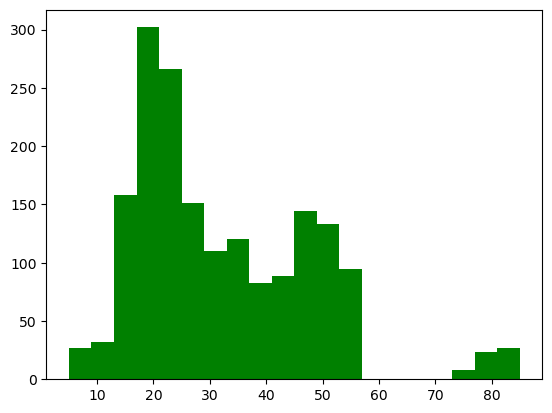

In [15]:
plt.hist(df['K'],bins=20,color='green')

In [16]:
df.groupby(['label']).count()

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
banana,100,100,100,100,100,100,100
blackgram,100,100,100,100,100,100,100
chickpea,58,58,58,58,58,58,58
coconut,85,85,85,85,85,85,85
coffee,100,100,100,100,100,100,100
cotton,100,100,100,100,100,100,100
jute,100,100,100,100,100,100,100
kidneybeans,100,100,100,100,100,100,100
lentil,100,100,100,100,100,100,100


In [18]:
a=df.groupby(['label']).size().reset_index(name='count').rename(columns={'Label':'Crops'})
a

,label,count
0,banana,100
1,blackgram,100
2,chickpea,58
3,coconut,85
4,coffee,100
5,cotton,100
6,jute,100
7,kidneybeans,100
8,lentil,100
9,maize,100


<BarContainer object of 20 artists>

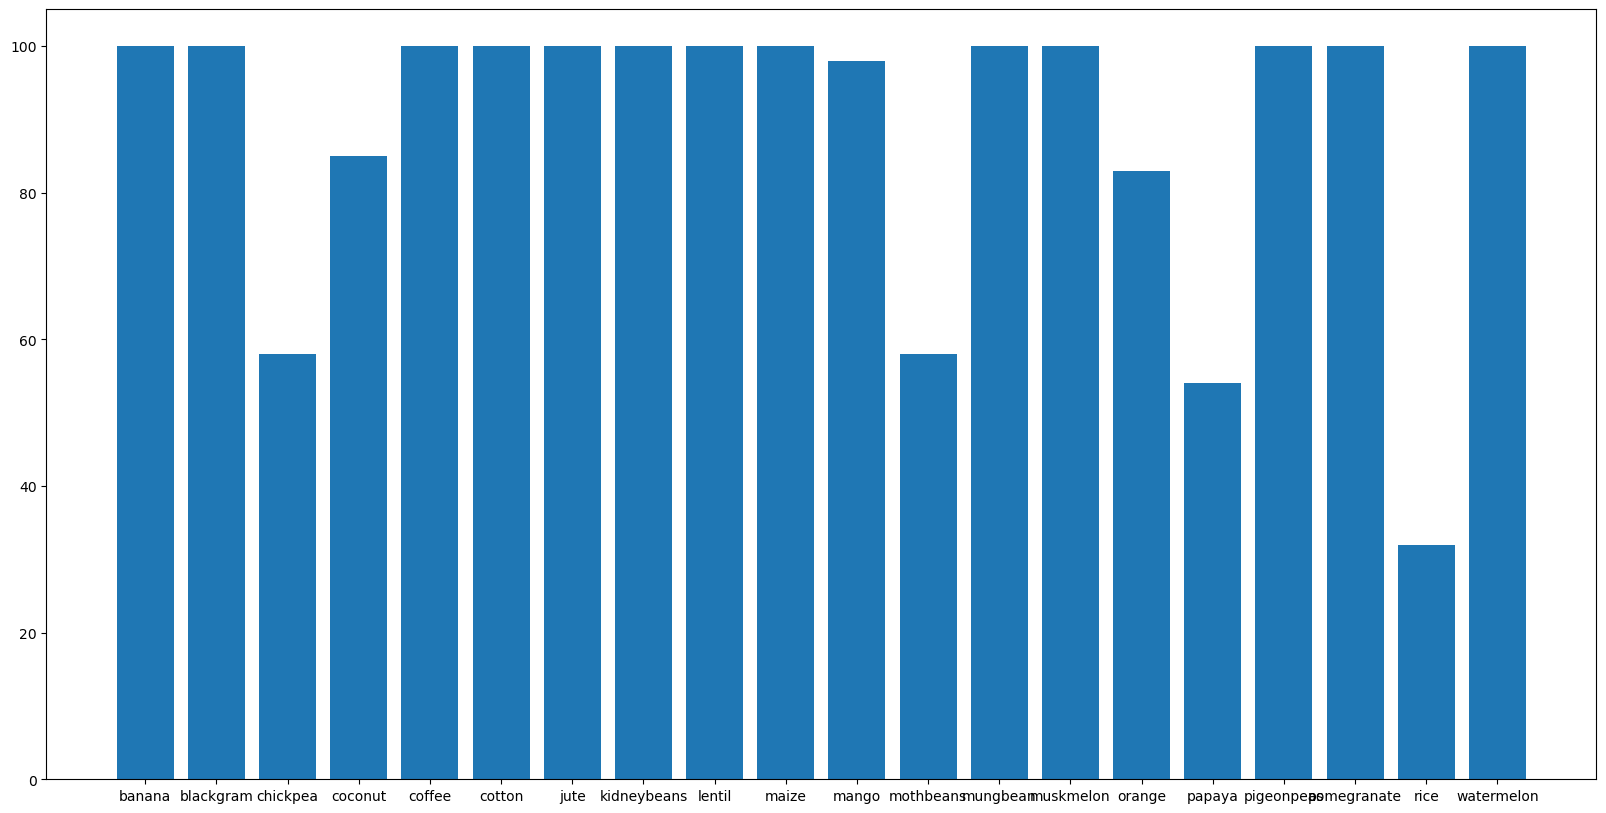

In [23]:
plt.figure(figsize=(20,10))
plt.bar(a['label'],a['count'])

In [24]:
a['Percentage']=a['count']/sum(a['count'])*100
a

,label,count,Percentage
0,banana,100,5.656109
1,blackgram,100,5.656109
2,chickpea,58,3.280543
3,coconut,85,4.807692
4,coffee,100,5.656109
5,cotton,100,5.656109
6,jute,100,5.656109
7,kidneybeans,100,5.656109
8,lentil,100,5.656109
9,maize,100,5.656109


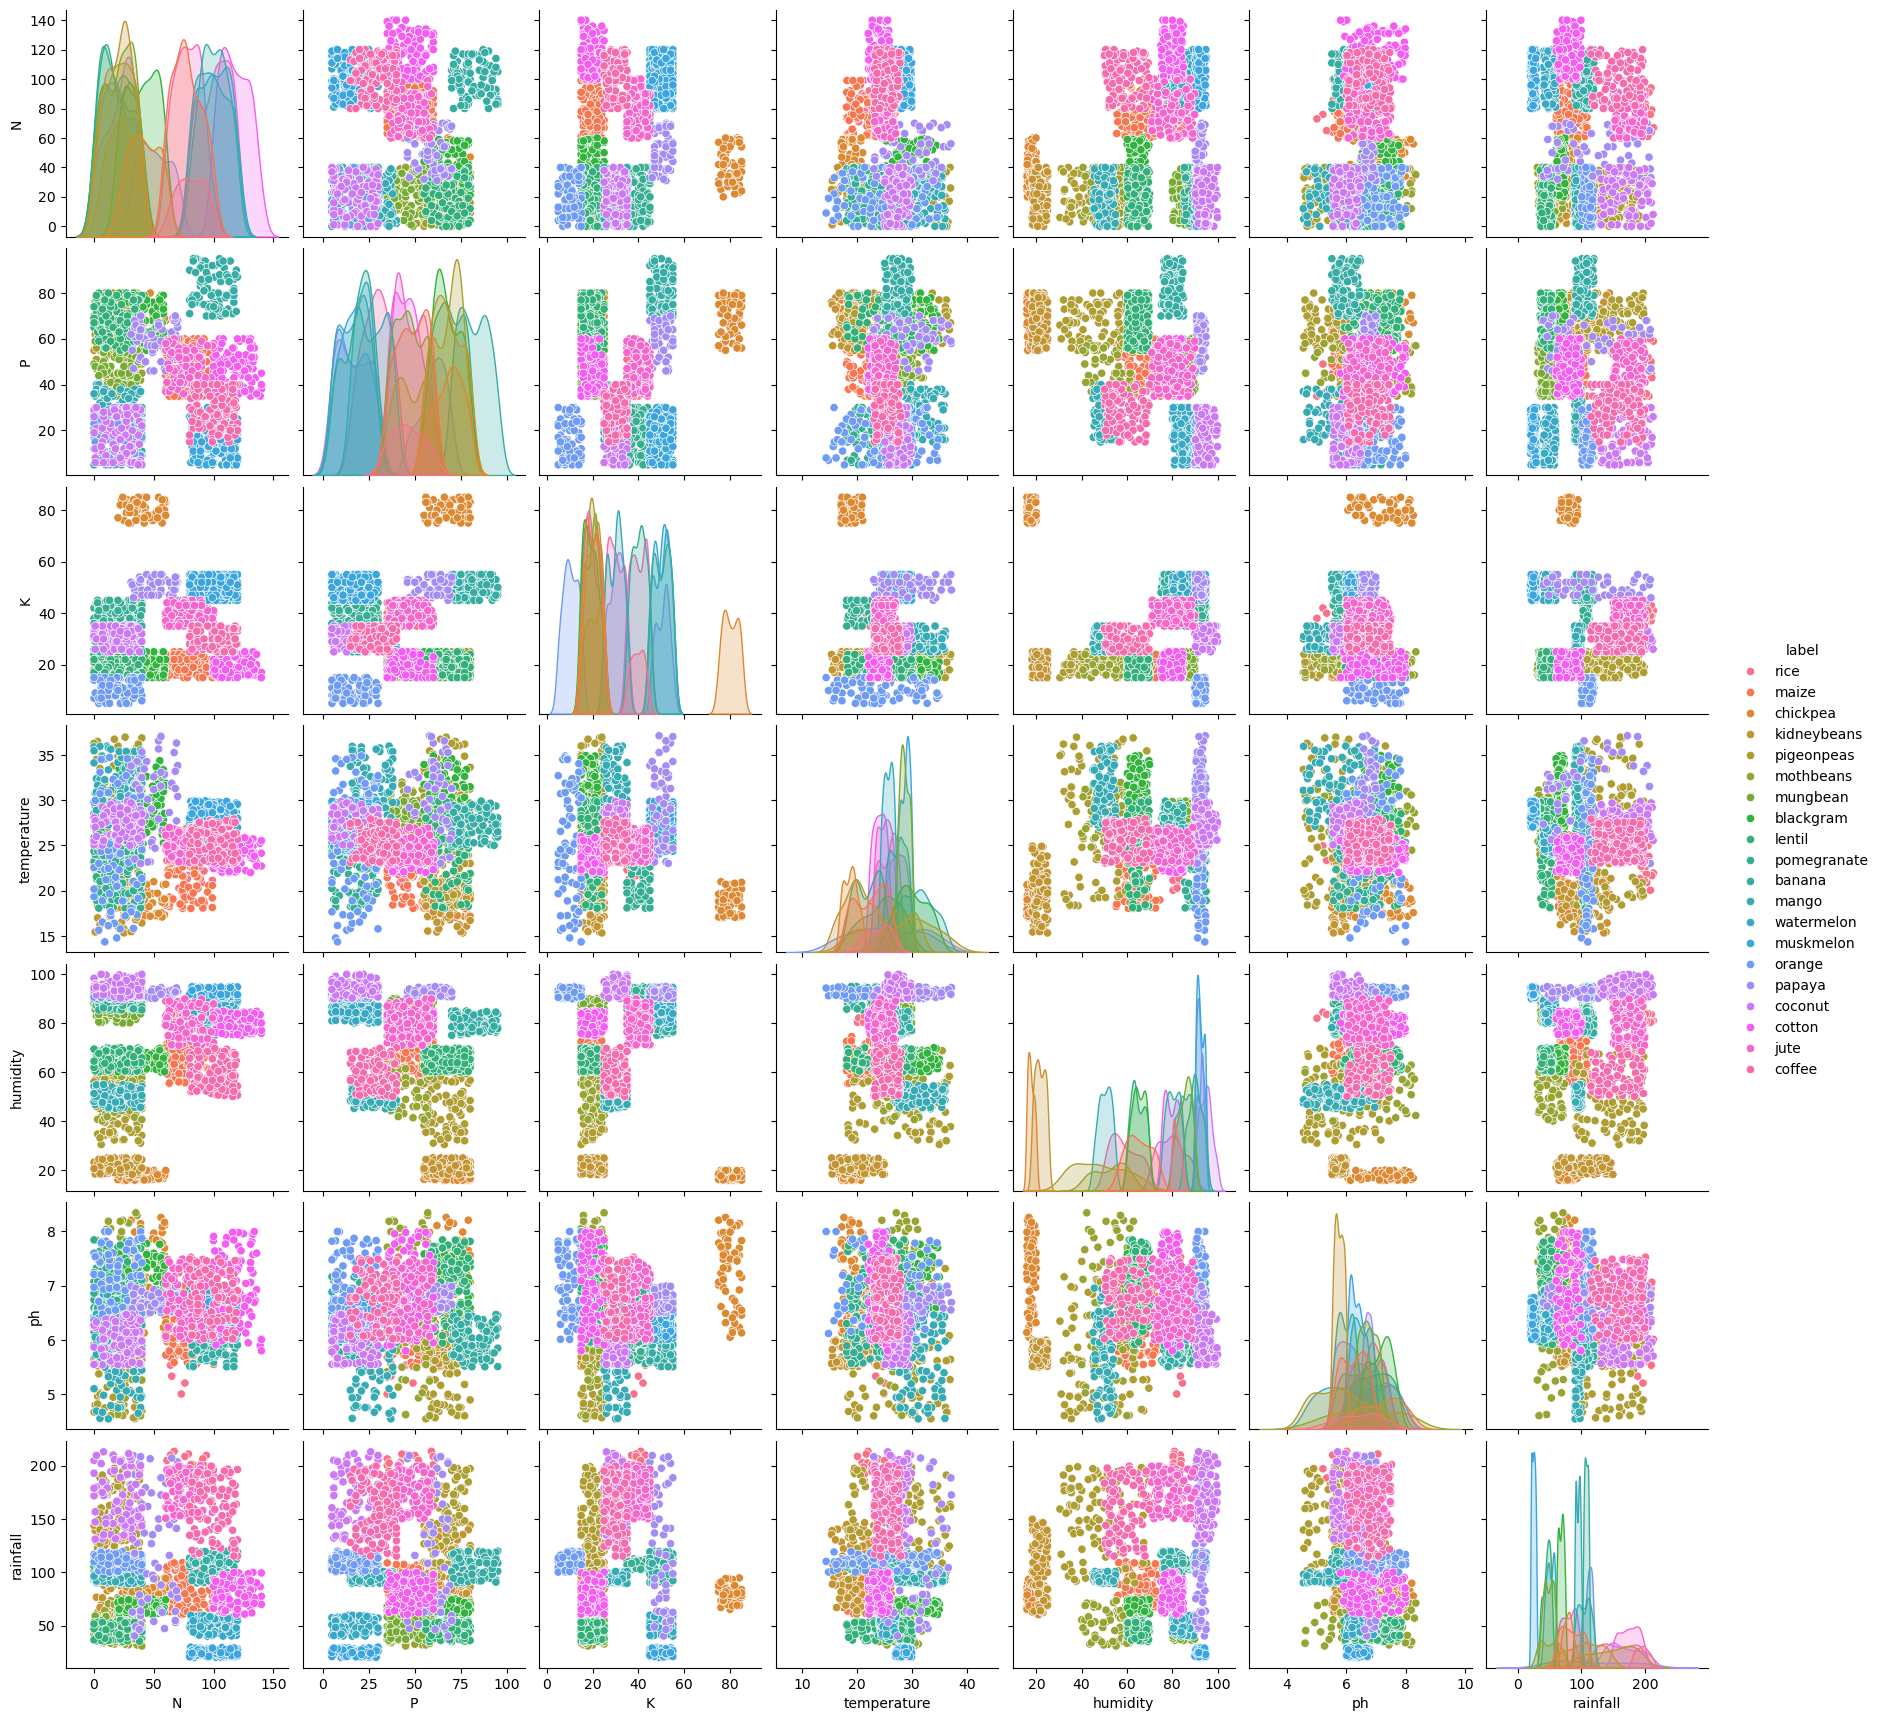

In [25]:
sns.pairplot(df,hue='label')

In [26]:
df1=df.drop(columns=['label'])
df1

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
13,93,56,36,24.014976,82.056872,6.984354,185.277339
14,94,50,37,25.665852,80.663850,6.948020,209.586971
17,91,35,39,23.793920,80.418180,6.970860,206.261186
20,89,45,36,21.325042,80.474764,6.442475,185.497473
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [27]:
df1.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.084996,0.343172,-0.022925,0.263791,0.091578,-0.021797
P,-0.084996,1.000000,-0.052944,-0.068690,-0.470329,-0.003966,-0.017827
K,0.343172,-0.052944,1.000000,-0.084430,0.059263,0.010826,-0.020435
temperature,-0.022925,-0.068690,-0.084430,1.000000,0.247642,-0.030254,-0.093072
humidity,0.263791,-0.470329,0.059263,0.247642,1.000000,0.138226,-0.030023
ph,0.091578,-0.003966,0.010826,-0.030254,0.138226,1.000000,-0.152062
rainfall,-0.021797,-0.017827,-0.020435,-0.093072,-0.030023,-0.152062,1.000000


<Axes: >

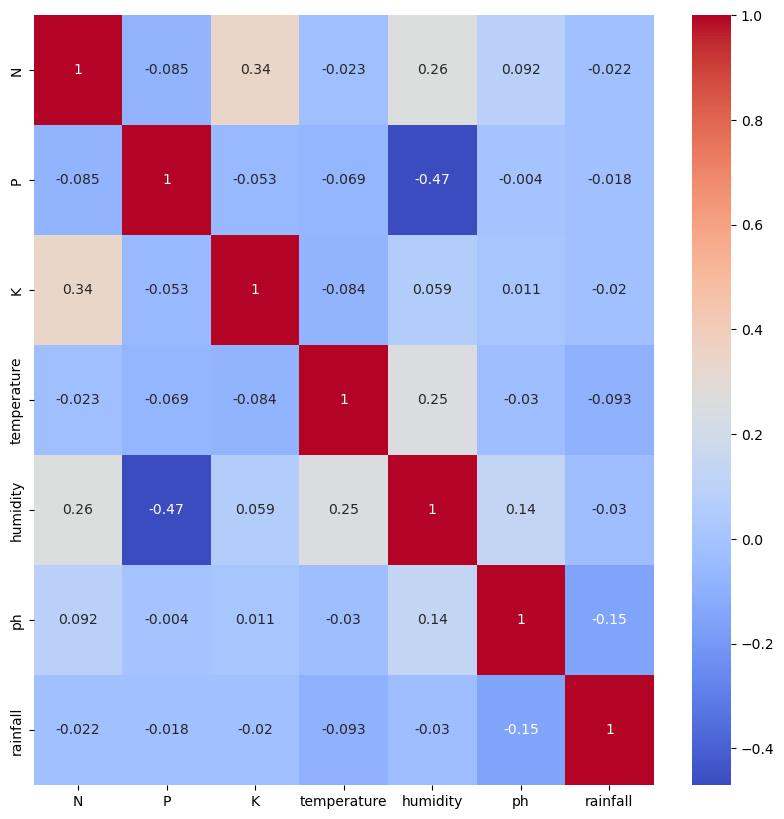

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm')

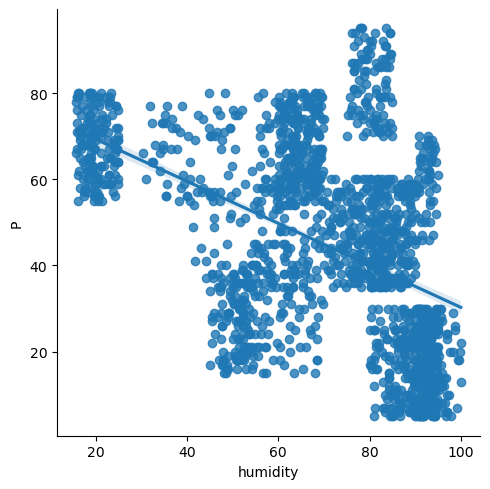

In [29]:
sns.lmplot(x='humidity',y='P',data=df)

In [30]:
x=df.drop(columns=['label'])
y=df['label']
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
13,93,56,36,24.014976,82.056872,6.984354,185.277339
14,94,50,37,25.665852,80.663850,6.948020,209.586971
17,91,35,39,23.793920,80.418180,6.970860,206.261186
20,89,45,36,21.325042,80.474764,6.442475,185.497473
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [31]:
y

0         rice
13        rice
14        rice
17        rice
20        rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 1768, dtype: object

In [32]:
from sklearn.feature_selection import f_classif
a=f_classif(x,y)
a

(array([ 879.87735413,  742.26069725, 2266.90559447,  127.16376955,
        2315.85411065,   74.08361738,  592.36868665]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 2.87413059e-312,
        0.00000000e+000, 5.70550659e-208, 0.00000000e+000]))

In [33]:
a=pd.Series(a[1])
a.index=x.columns
a

N               0.000000e+00
P               0.000000e+00
K               0.000000e+00
temperature    2.874131e-312
humidity        0.000000e+00
ph             5.705507e-208
rainfall        0.000000e+00
dtype: float64

In [34]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
13,93,56,36,24.014976,82.056872,6.984354,185.277339,rice
14,94,50,37,25.665852,80.663850,6.948020,209.586971,rice
17,91,35,39,23.793920,80.418180,6.970860,206.261186,rice
20,89,45,36,21.325042,80.474764,6.442475,185.497473,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [47]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [36]:
x=df.drop(columns=['label'])
y=df['label']
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
13,93,56,36,24.014976,82.056872,6.984354,185.277339
14,94,50,37,25.665852,80.663850,6.948020,209.586971
17,91,35,39,23.793920,80.418180,6.970860,206.261186
20,89,45,36,21.325042,80.474764,6.442475,185.497473
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [37]:
y

0         rice
13        rice
14        rice
17        rice
20        rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 1768, dtype: object

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [40]:
rf=RandomForestClassifier()
param_grid = {
    'n_estimators': [500,1000,2000],
    'max_depth': [15,20,25],
    'min_samples_split': [5,7,8]
}


In [52]:
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring='accuracy')

In [53]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [15, 20, 25],
                         'min_samples_split': [5, 7, 8],
                         'n_estimators': [500, 1000, 2000]},
             scoring='accuracy')

In [54]:
grid_search.best_params_

{'max_depth': 15, 'min_samples_split': 7, 'n_estimators': 500}

In [55]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_split=7, n_estimators=500)

In [56]:
pr=grid_search.best_estimator_.predict(x_test)
print(f"The accuracy of our model is:{accuracy_score(pr,y_test)}")

The accuracy of our model is:0.9897260273972602


In [57]:
print(f"{classification_report(pr,y_test)})

              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        31
   blackgram       0.97      1.00      0.99        37
    chickpea       1.00      1.00      1.00        14
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        37
      cotton       1.00      0.96      0.98        27
        jute       1.00      0.88      0.94        33
 kidneybeans       1.00      1.00      1.00        37
      lentil       1.00      1.00      1.00        31
       maize       0.97      0.97      0.97        33
       mango       1.00      1.00      1.00        31
   mothbeans       1.00      1.00      1.00        21
    mungbean       1.00      1.00      1.00        34
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        29
      papaya       1.00      1.00      1.00        25
  pigeonpeas       1.00      1.00      1.00        34
 pomegranate       1.00    

In [60]:
import joblib
joblib.dump(grid_search,'C:/Users/Administrator/Documents/MILESTONE/Crops_RandomForestClassifier.pkl')

['C:/Users/Administrator/Documents/MILESTONE/Crops_RandomForestClassifier.pkl']

#### To use this trained model in future use joblib.load